# 1. Import module yang dibutuhkan

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from cv2_plt_imshow import cv2_plt_imshow

# 2. Load Dataset

In [2]:
imagePaths = 'Dataset/'
label_list = ['Jeruk Nipis', 'pandan']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(100, 32, 32, 3)

# 3. Data Preprocessing

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis' 'Jeruk Nipis'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan

In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# 4. Split Dataset

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


# 5. Build CNN Architecture

In [10]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [12]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [13]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

# 6. Train Model

In [14]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 95ms/step - loss: 4.3054 - accuracy: 0.4750 - val_loss: 1.3801 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 1.2847 - accuracy: 0.4500 - val_loss: 0.7297 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6743 - accuracy: 0.5500 - val_loss: 0.6683 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 38ms/step - loss: 0.6206 - accuracy: 0.6250 - val_loss: 0.5396 - val_accuracy: 0.9500
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.5796 - accuracy: 0.7250 - val_loss: 0.6460 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 38ms/step - loss: 0.4758 - accuracy: 0.7500 - val_loss: 0.3397 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 39ms/step - loss: 0.3498 - accuracy: 0.9375 - val_loss: 0.1647 - val_accuracy: 1.0000
Epoch 8/100
3/3 [===

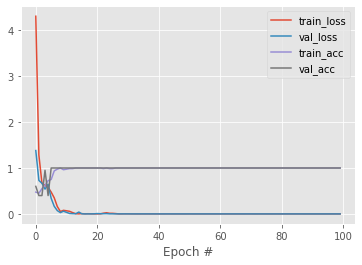

In [15]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

# 7. Evaluate the Model

In [16]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

 Jeruk Nipis       1.00      1.00      1.00        12
      pandan       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [32]:
# uji model menggunakan image lain
queryPath = 'tes2.jpg'
query = cv2.imread(queryPath)
output = cv2.resize(query,(400,300))
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.04001072]]


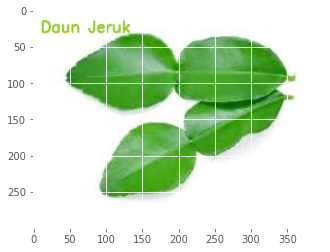

In [33]:
if q_pred<=0.5 :
    target = "Daun Jeruk"
else :
    target = "Pandan"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 205, 154), 2)
 
# menampilkan output image
cv2_plt_imshow(output)
